VISUALISATION FOLLOWING THE DESCRIPTIVE ANALYTICS REPORT FOR STAKEHOLDER PRESENTATION

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the cleansed dataset
df = pd.read_excel('_Delta Airlines Loyalty Customer Cleansed Data.xlsx')

# Display the first few rows to confirm load success
df.head()


,Record Creation Date,Join Date,Frequent Flier Number,First Name,Last Name,Inquiry Type,Most Recent Flight #,Lounge Used?,Departing Airport,Arrival Airport,Planned Snack?,Additional Snack?,# of Included Checked Bags,Total # of Checked Bags,Flight Delayed?,Lead Source,Online Check-In,Add-On Spend
0,2024-02-27,1988-07-08,7234617746,Debbie,Spears,Flight Status,G35206241,False,HND,HND,False,True,2,7,True,Travel Agency,False,21.14
1,2021-03-07,1988-07-08,7234617746,Debbie,Spears,New Flight,V81311927,True,JFK,SFO,False,True,1,6,False,Travel Agency,False,95.57
2,2023-01-31,1988-07-08,7234617746,Debbie,Spears,Cancel Flight,H82295055,False,CDG,ORD,False,False,2,5,True,Discounted Promo,False,8.66
3,2021-08-21,2022-06-16,551121699,Kyle,Boone,New Flight,E39886834,True,SEA,DEN,False,True,3,8,False,Discounted Promo,False,82.59
4,2022-03-01,2022-06-16,551121699,Kyle,Boone,New Flight,R04390271,True,SFO,DXB,False,False,3,5,False,Discounted Promo,False,26.70


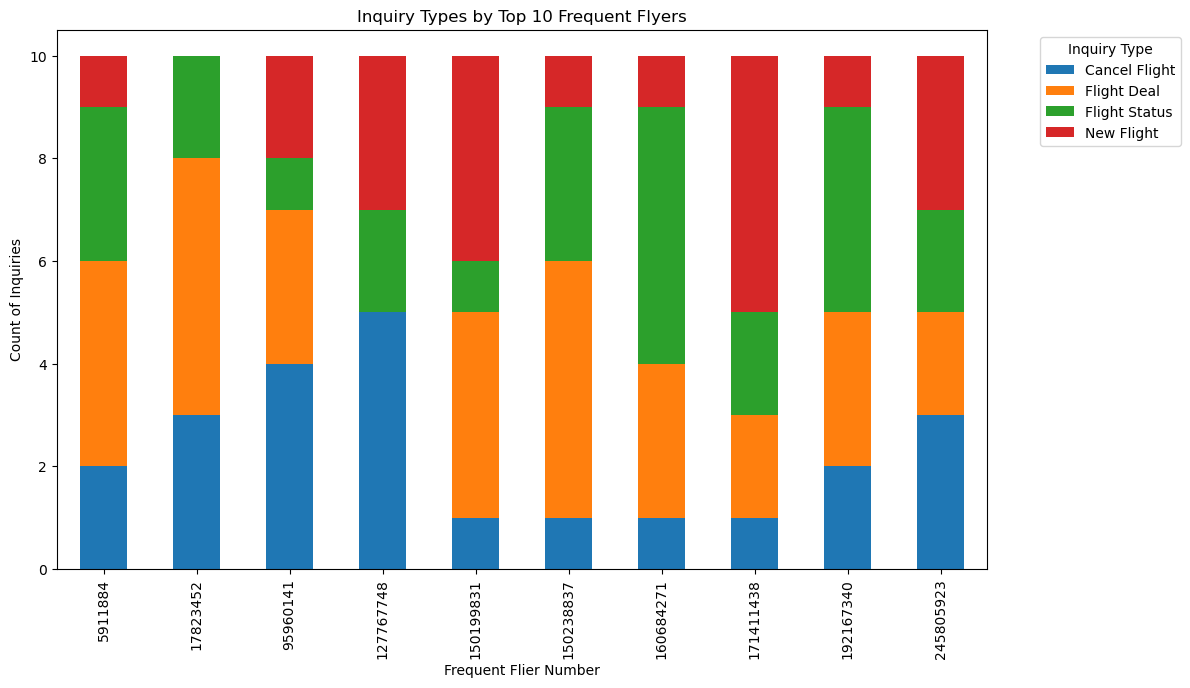

In [35]:
# Aggregate data for frequent flyer inquiries
frequent_flyer_inquiry = df.groupby('Frequent Flier Number')['Inquiry Type'].value_counts().unstack().fillna(0)

# Plotting inquiry types by top frequent flyers
top_flyers = frequent_flyer_inquiry.sum(axis=1).nlargest(10)  # Select top 10
top_flyer_data = frequent_flyer_inquiry.loc[top_flyers.index]  # Filter for top 10 flyer data

# Plot as stacked bar chart
top_flyer_data.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Inquiry Types by Top 10 Frequent Flyers')
plt.xlabel('Frequent Flier Number')
plt.ylabel('Count of Inquiries')
plt.legend(title='Inquiry Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('frequent_flyer_behavior.png', format='png', bbox_inches='tight')
plt.show()


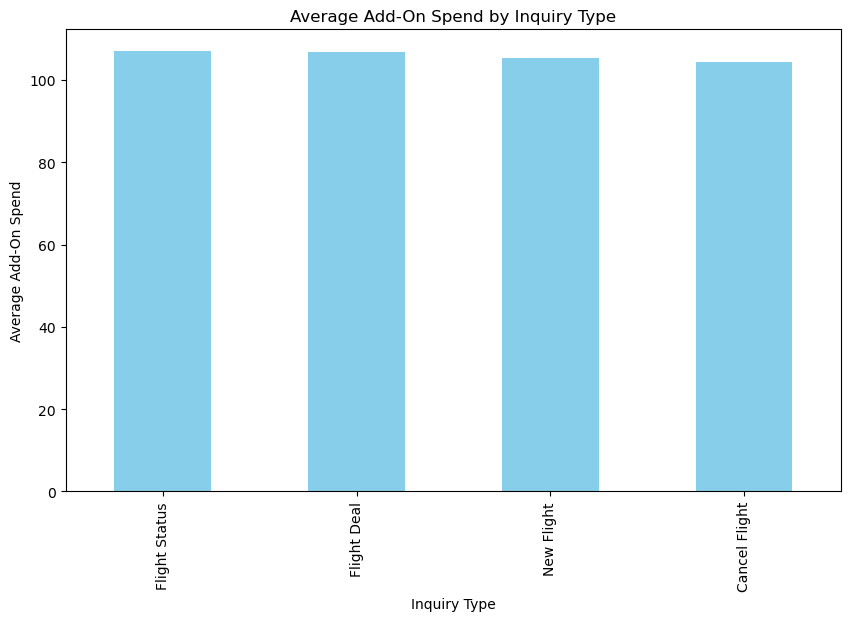

In [37]:
# Calculate average and total Add-On Spend by inquiry type
add_on_spend = df.groupby('Inquiry Type')['Add-On Spend'].agg(['mean', 'sum', 'count'])

# Plotting average add-on spend by inquiry type
add_on_spend['mean'].sort_values(ascending=False).plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Average Add-On Spend by Inquiry Type')
plt.xlabel('Inquiry Type')
plt.ylabel('Average Add-On Spend')
plt.savefig('add_on_spend_by_inquiry_type.png', format='png', bbox_inches='tight')
plt.show()


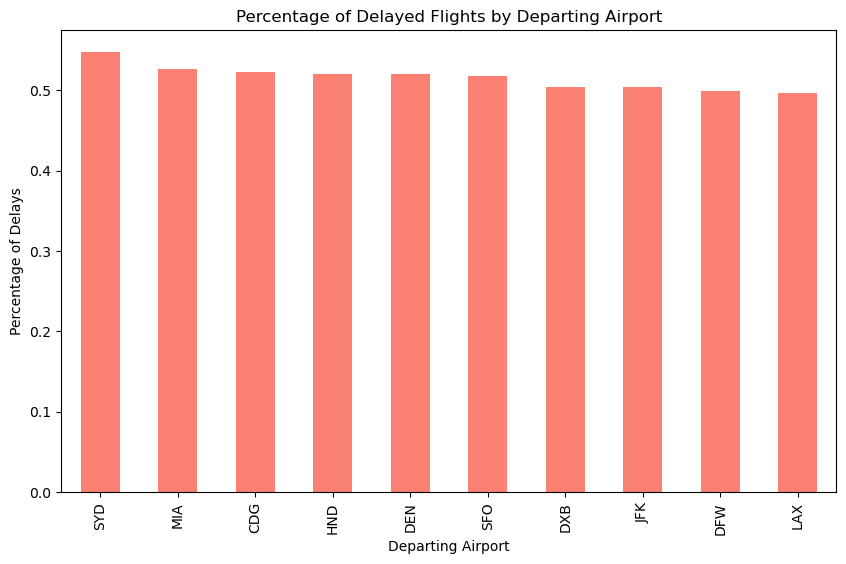

In [39]:
# Calculate the percentage of delayed flights by airport
delayed_flights_by_airport = df.groupby('Departing Airport')['Flight Delayed?'].mean()

# Plotting the delay percentage by departing airport
delayed_flights_by_airport.sort_values(ascending=False).head(10).plot(kind='bar', color='salmon', figsize=(10, 6))
plt.title('Percentage of Delayed Flights by Departing Airport')
plt.xlabel('Departing Airport')
plt.ylabel('Percentage of Delays')
plt.savefig('flight_delays_by_airport.png', format='png', bbox_inches='tight')
plt.show()


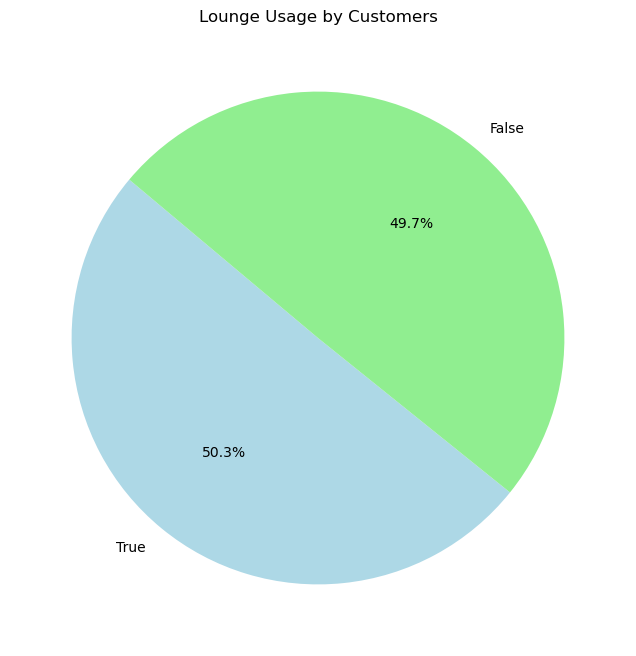

In [41]:
# Calculate the percentage of customers using lounges
lounge_usage = df['Lounge Used?'].value_counts(normalize=True) * 100

# Plotting lounge usage
lounge_usage.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen'], figsize=(8, 8))
plt.title('Lounge Usage by Customers')
plt.ylabel('')
plt.savefig('lounge_usage_by_frequent_flyers.png', format='png', bbox_inches='tight')
plt.show()


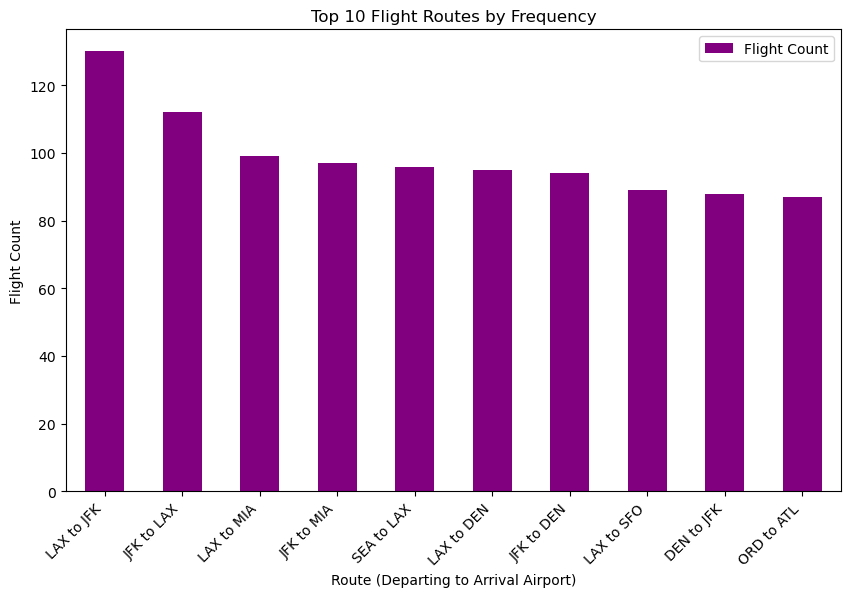

In [43]:
# Count the number of flights per route (from departing to arrival airport)
flight_routes = df.groupby(['Departing Airport', 'Arrival Airport']).size().reset_index(name='Flight Count')

# Combine 'Departing Airport' and 'Arrival Airport' to create a 'Route' column
flight_routes['Route'] = flight_routes['Departing Airport'] + " to " + flight_routes['Arrival Airport']

# Sort by 'Flight Count' and get the top 10 routes
top_routes = flight_routes.sort_values(by='Flight Count', ascending=False).head(10)

# Plotting top flight routes
top_routes.plot(kind='bar', x='Route', y='Flight Count', color='purple', figsize=(10, 6))
plt.title('Top 10 Flight Routes by Frequency')
plt.xlabel('Route (Departing to Arrival Airport)')
plt.ylabel('Flight Count')
plt.xticks(rotation=45, ha='right')
plt.savefig('top_10_flight_routes.png', format='png', bbox_inches='tight')
plt.show()


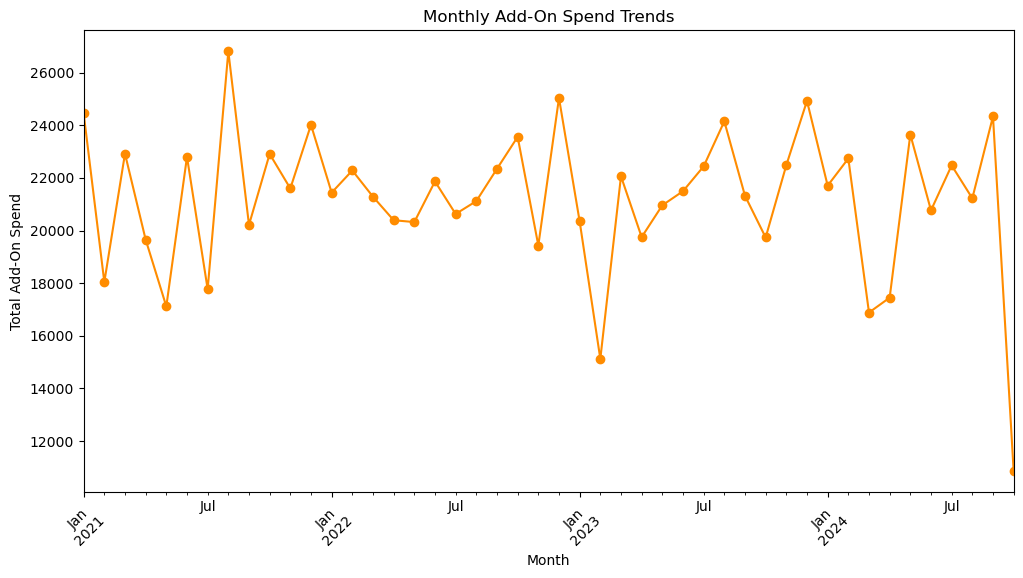

In [45]:
# Convert Record Creation Date to datetime
df['Record Creation Date'] = pd.to_datetime(df['Record Creation Date'])

# Group by month and calculate add-on spend
monthly_spend = df.groupby(df['Record Creation Date'].dt.to_period('M'))['Add-On Spend'].sum()

# Plotting monthly add-on spend
monthly_spend.plot(kind='line', marker='o', color='darkorange', figsize=(12, 6))
plt.title('Monthly Add-On Spend Trends')
plt.xlabel('Month')
plt.ylabel('Total Add-On Spend')
plt.xticks(rotation=45)
plt.savefig('monthly_add-on_spend_trends.png', format='png', bbox_inches='tight')
plt.show()
